# In this notebook I will make a Hovmoller Diagram of ORAs Data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import numpy as np
import xesmf as xe
from   scipy.interpolate import griddata
import dask as dsk

import hvplot.xarray
import hvplot.pandas

from   cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

proj = ccrs.PlateCarree()

In [2]:
temp_5814= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_58-14.nc")
temp_1518= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_15-18_correct.nc")
temp_1923= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_19-23_correct.nc")

In [3]:
temp_ya = xr.concat([temp_5814, temp_1518, temp_1923], dim="time")
temp_ya 

<xarray.Dataset>
Dimensions:   (deptht: 38, lat: 180, lon: 170, time: 66)
Coordinates:
  * deptht    (deptht) float32 1.556 2.668 3.856 5.14 ... 370.7 411.8 457.6
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time      (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31
Data variables:
    votemper  (time, deptht, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

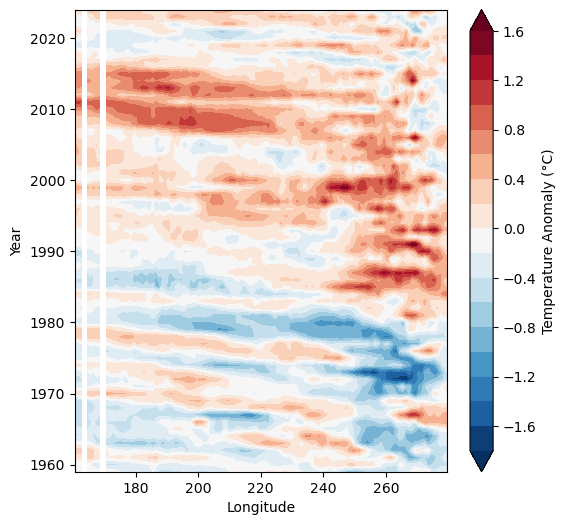

In [4]:
equator_data = temp_ya.sel(lat=-20, method="nearest").sel(deptht = 200, method="nearest").sel(lon=slice('160','280'))

# Extract data
lons = equator_data.lon.values
times = equator_data.time.values
temp_values = equator_data.votemper.values  

# Create figure
plt.figure(figsize=(6, 6))

# Hovmöller plot
plt.contourf(lons, times, temp_values, levels=20, cmap="RdBu_r", extend="both")

# Add colorbar
plt.colorbar(label="Temperature Anomaly (°C)")

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Year")
#plt.title("Hovmöller Diagram of Equatorial Temperature 0* - 0 m")


# Show plot
plt.show()



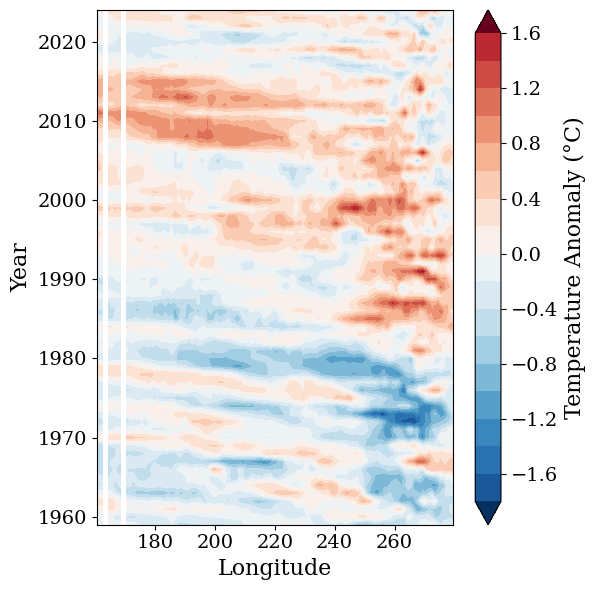

In [13]:
# Select equatorial data
equator_data = temp_ya.sel(lat=-20, method="nearest").sel(deptht=200, method="nearest").sel(lon=slice('160', '280'))

# Extract values
lons = equator_data.lon.values
times = equator_data.time.values
temp_values = equator_data.votemper.values  

# Font
plt.rcParams['font.family'] = 'serif'

# Create figure
plt.figure(figsize=(6, 6))

# Colorbar contours
contour = plt.contourf(
    lons, times, temp_values,
    levels=20, cmap="RdBu_r", extend="both",
    vmin=-2, vmax=2
)

# Colorbar
cbar = plt.colorbar(contour)
cbar.set_label("Temperature Anomaly (°C)", fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Axis labels
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Year", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Layout
plt.tight_layout()

# Safe figure
plt.savefig("equator_hovmoller_200m.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


